In [75]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [76]:
df = pd.read_csv('car data.csv')

In [77]:
os.listdir()

['.ipynb_checkpoints',
 'CAR DETAILS FROM CAR DEKHO.csv',
 'gradient_boost_regression_model.pkl',
 'Car details v3.csv',
 'requirements.txt',
 'car data.csv',
 'Selling_price_prediction.ipynb']

In [78]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Basic Information

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [80]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [81]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Exploration of each feature

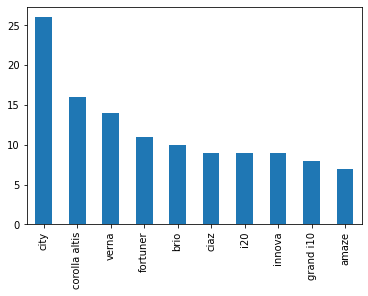

In [82]:
## Car name
df['Car_Name'].value_counts()[:10].plot(kind = 'bar')

In [83]:
df['Car_Name'].value_counts()[:20].sum()

174

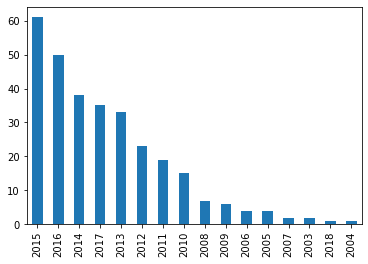

In [84]:
df['Year'].value_counts().plot(kind = 'bar')

In [85]:
max_sales_per_year = df.groupby(['Car_Name','Year'])['Selling_Price'].count().reset_index().sort_values(ascending=False,by = ['Selling_Price'])

In [86]:
df.groupby(['Car_Name','Year'])['Selling_Price','Present_Price','Kms_Driven'].mean().reset_index()

<ipython-input-86-55e1dd5a359f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Car_Name','Year'])['Selling_Price','Present_Price','Kms_Driven'].mean().reset_index()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven
0,800,2003,0.350000,2.280000,127000.000000
1,Activa 3g,2008,0.170000,0.520000,500000.000000
2,Activa 3g,2016,0.450000,0.540000,500.000000
3,Activa 4g,2017,0.400000,0.510000,1300.000000
4,Bajaj ct 100,2015,0.180000,0.320000,35000.000000
5,Bajaj Avenger 150,2016,0.750000,0.800000,7000.000000
6,Bajaj Avenger 150 street,2016,0.600000,0.800000,20000.000000
7,Bajaj Avenger 220,2016,0.720000,0.950000,500.000000
8,Bajaj Avenger 220,2017,0.825000,0.950000,2400.000000
9,Bajaj Avenger 220 dtsi,2010,0.450000,0.950000,27000.000000


In [87]:
print(df['Transmission'].unique())
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())

['Manual' 'Automatic']
['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']


## New feature of how old the car is?

In [88]:
df['no_of_years'] = 2020 - df['Year']

In [89]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [90]:
df.drop(['Year'],1,inplace=True)

In [91]:
df.corr(method = 'spearman')

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years
Selling_Price,1.000000,0.908251,0.146343,-0.144264,-0.282620
Present_Price,0.908251,1.000000,0.376546,-0.100324,0.010963
Kms_Driven,0.146343,0.376546,1.000000,0.023536,0.633085
Owner,-0.144264,-0.100324,0.023536,1.000000,0.138104
no_of_years,-0.282620,0.010963,0.633085,0.138104,1.000000


## Encoding

In [92]:
cars = df['Car_Name'].value_counts()[:10].index.tolist()

In [93]:
df['Car_Name'] = [x if x in cars else 'other' for x in df['Car_Name']]

In [94]:
final_df = pd.get_dummies(df,columns = ['Car_Name','Fuel_Type','Seller_Type','Transmission'],drop_first=True)

In [95]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Car_Name_brio,Car_Name_ciaz,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i20,Car_Name_innova,Car_Name_other,Car_Name_verna,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,4.75,9.54,43000,0,7,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,2.85,4.15,5200,0,9,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,4.60,6.87,42450,0,6,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [96]:
final_df.drop('Owner',1,inplace=True)

In [97]:
final_df.shape

(301, 18)

In [98]:
final_df.rename(columns={'Car_Name_corolla altis':'Car_Name_corolla_altis','Car_Name_grand i10':'Car_Name_grand_i10'},inplace = True)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X = final_df.drop('Selling_Price',1)
y = df['Selling_Price']

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [102]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,accuracy_score

In [103]:
lr = LinearRegression()

In [104]:
lr.fit(X_train,y_train)

LinearRegression()

In [105]:
y_pred = lr.predict(X_test)

In [106]:
mean_squared_error(y_test,y_pred) ** 0.5

1.6646168389244196

In [107]:
from sklearn.ensemble import GradientBoostingRegressor

In [108]:
gbr = GradientBoostingRegressor()

In [109]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [110]:
y_pred_gbr = gbr.predict(X_test)

In [111]:
mean_squared_error(y_test,y_pred_gbr) ** 0.5

1.081785276527545

In [112]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [113]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [114]:
gbr_random = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [115]:
gbr_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   21.9s finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [116]:
gbr_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [117]:
gbr_random.best_score_

-2.622137746520853

In [118]:
predictions = gbr_random.predict(X_test)

In [119]:
mean_squared_error(y_test,predictions) ** 0.5

1.069319632663194

In [120]:
import pickle

In [121]:
# open a file, where you ant to store the data
file = open('gradient_boost_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(gbr_random, file)

In [123]:
X_train

,Present_Price,Kms_Driven,no_of_years,Car_Name_brio,Car_Name_ciaz,Car_Name_city,Car_Name_corolla_altis,Car_Name_fortuner,Car_Name_grand_i10,Car_Name_i20,Car_Name_innova,Car_Name_other,Car_Name_verna,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
185,0.580,1900,12,0,0,0,0,0,0,0,0,1,0,0,1,1,0
72,18.610,56001,7,0,0,0,1,0,0,0,0,0,0,0,1,0,1
15,10.790,43000,4,0,0,0,0,0,0,0,0,1,0,1,0,0,1
10,3.600,2135,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
196,0.520,500000,12,0,0,0,0,0,0,0,0,1,0,0,1,1,0
298,11.000,87934,11,0,0,1,0,0,0,0,0,0,0,0,1,0,1
68,13.740,88000,9,0,0,0,1,0,0,0,0,0,0,0,1,0,1
226,5.700,24678,5,0,0,0,0,0,1,0,0,0,0,0,1,0,1
37,2.280,127000,17,0,0,0,0,0,0,0,0,1,0,0,1,1,1
16,10.790,41678,5,0,0,0,0,0,0,0,0,1,0,1,0,0,1
